Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **37 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Liuda Serohina"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Heaps and Heapsort


## Question 1 [time estimate: 10 minutes]

Given the array `H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]`, perform the following operations:
1. Draw the corresponding binary tree of H. Is the binary tree a valid max heap? Explain your answer.
2. Using as a model the drawing examples illustrated in Figure 6.2 of Cormen et al.,  draw a step-by-step transformation of the array above into a valid max heap. 
3. Now that you have obtained a valid max heap, write out the corresponding array that stores the valid max-heap.

Use as many cells as you wish for this question.

NOTE: Just before submitting, I noticed that I missed one 85 from the original array.
1.The binary tree we get from array H is not a valid max heap because the max heap property is violated starting from the root node. In max heap, the root node must be greater than any other node, which is not the case here because 39 is not the largest value.
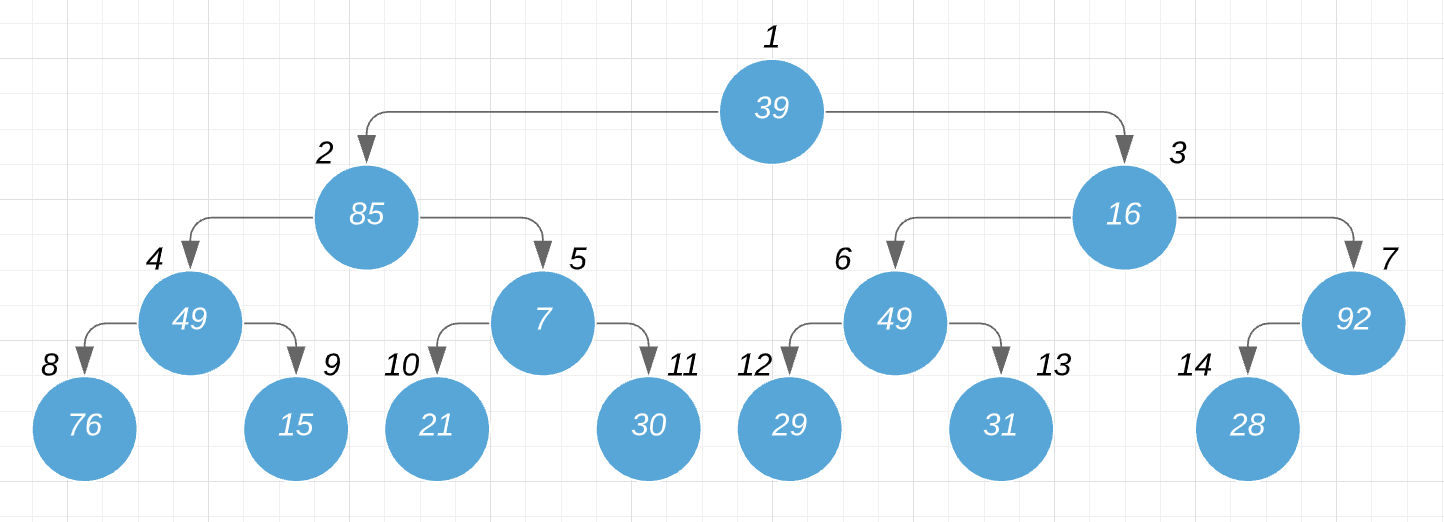

2.To get the a valid max heap, I do the following: starting at index 1, I assign i to a value at that index and check if that value is greater than its 2 children nodes. If it is, I do not change it and move to the next index. 
Start at i=1, 39 < 85, swap them.
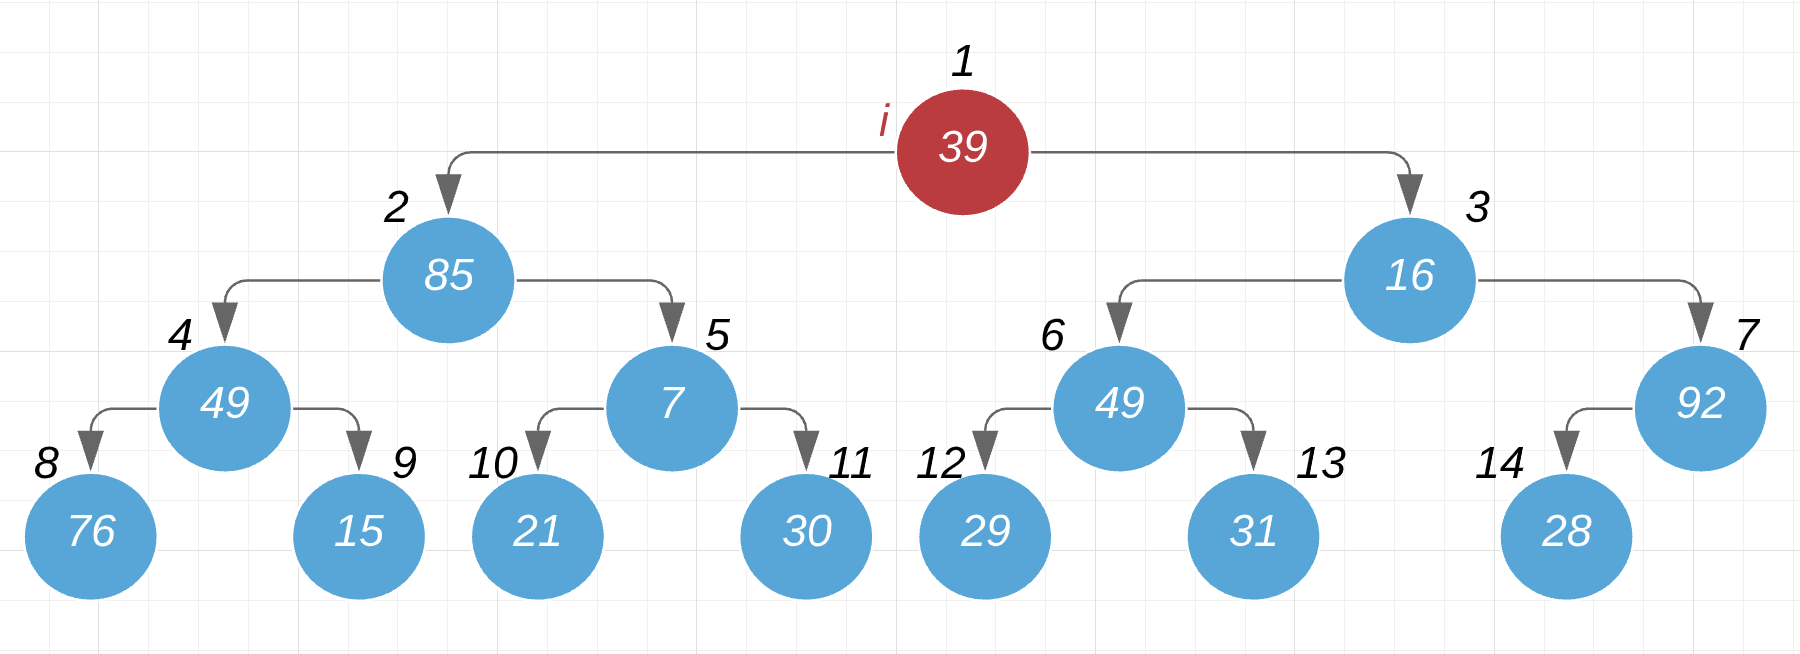
39 < 49. 49 > 39 > 7. Swap 39 and 49:
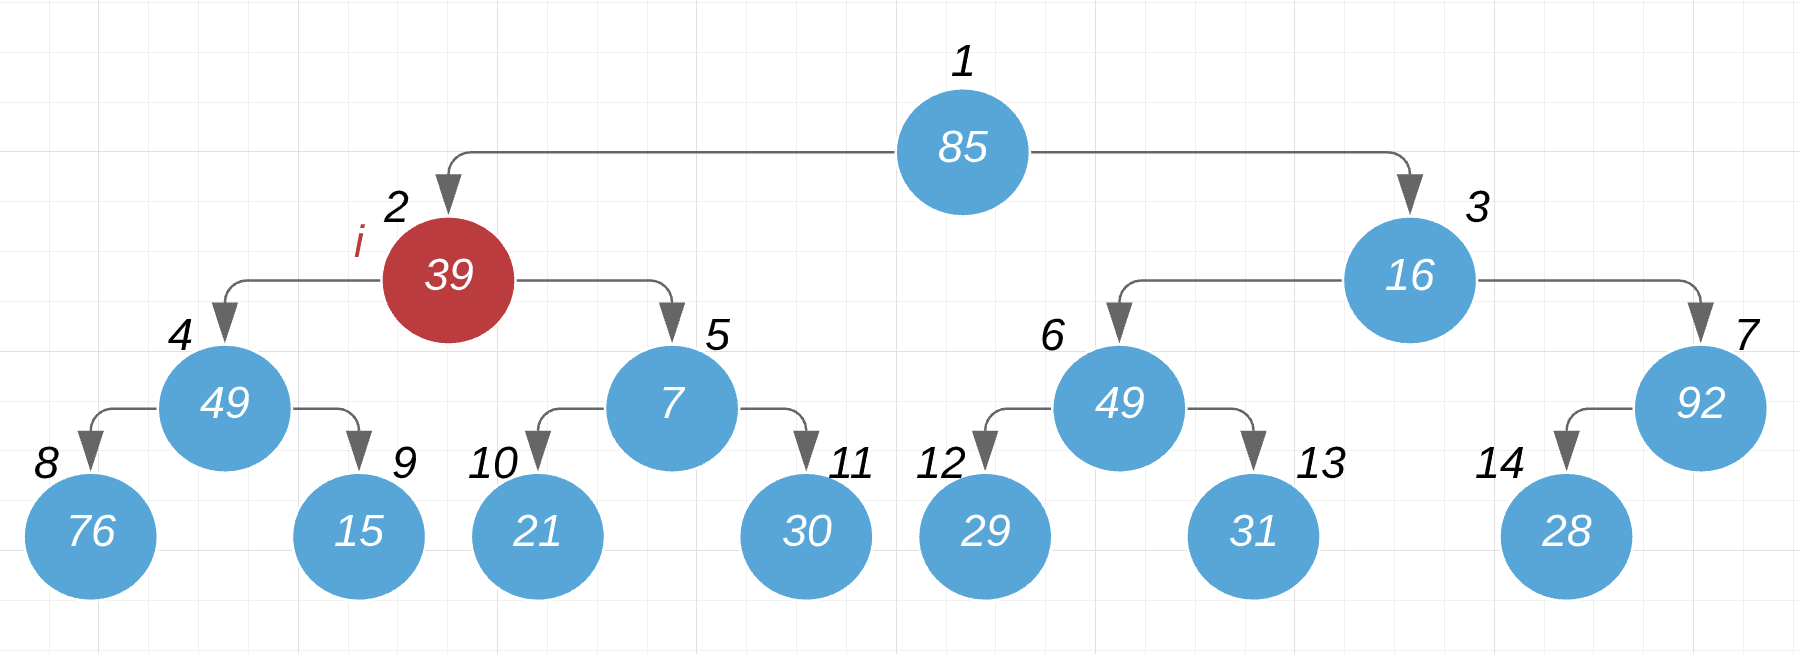
39 < 76. 76 > 39 > 15. Swap 39 and 76:
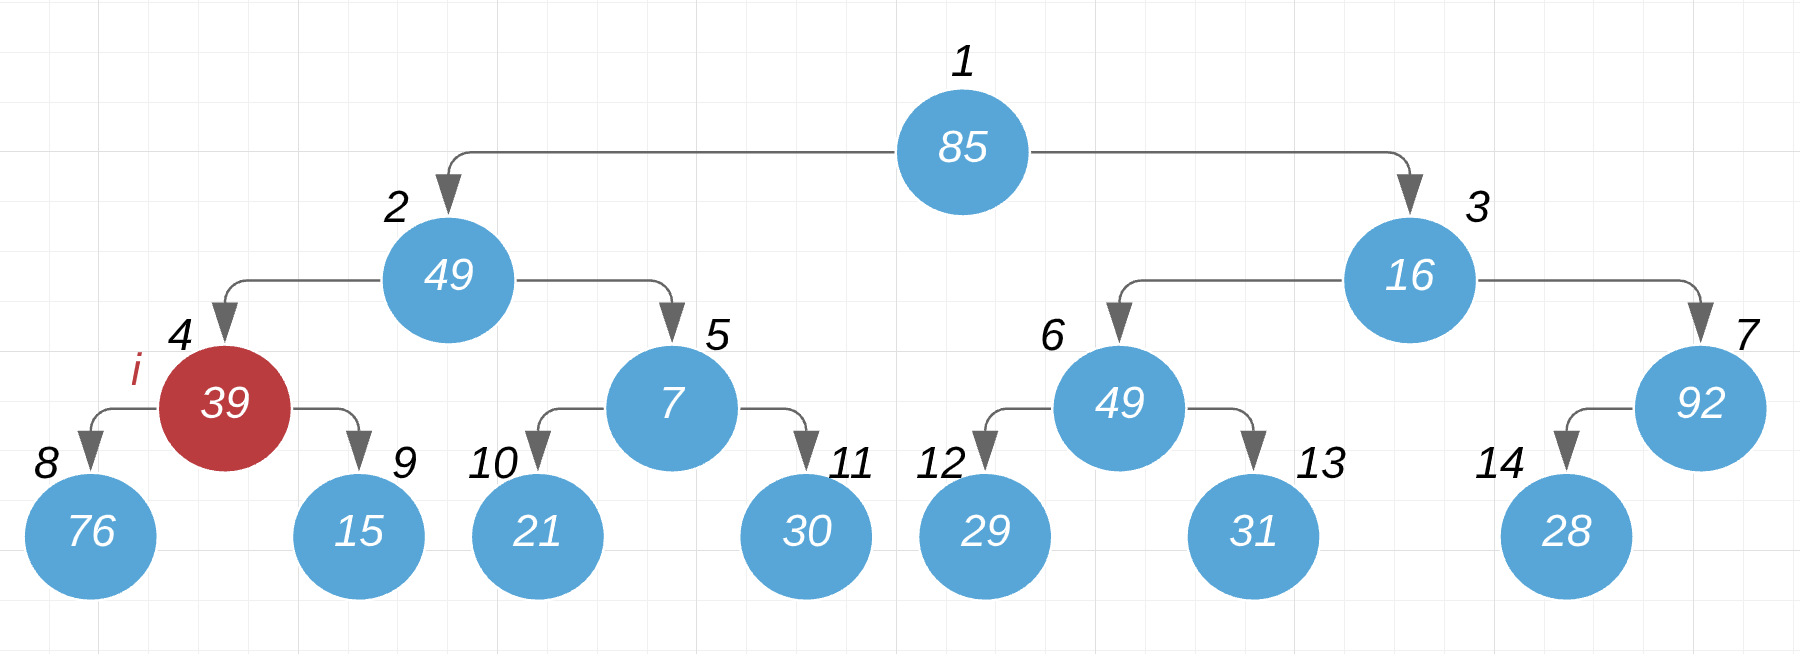
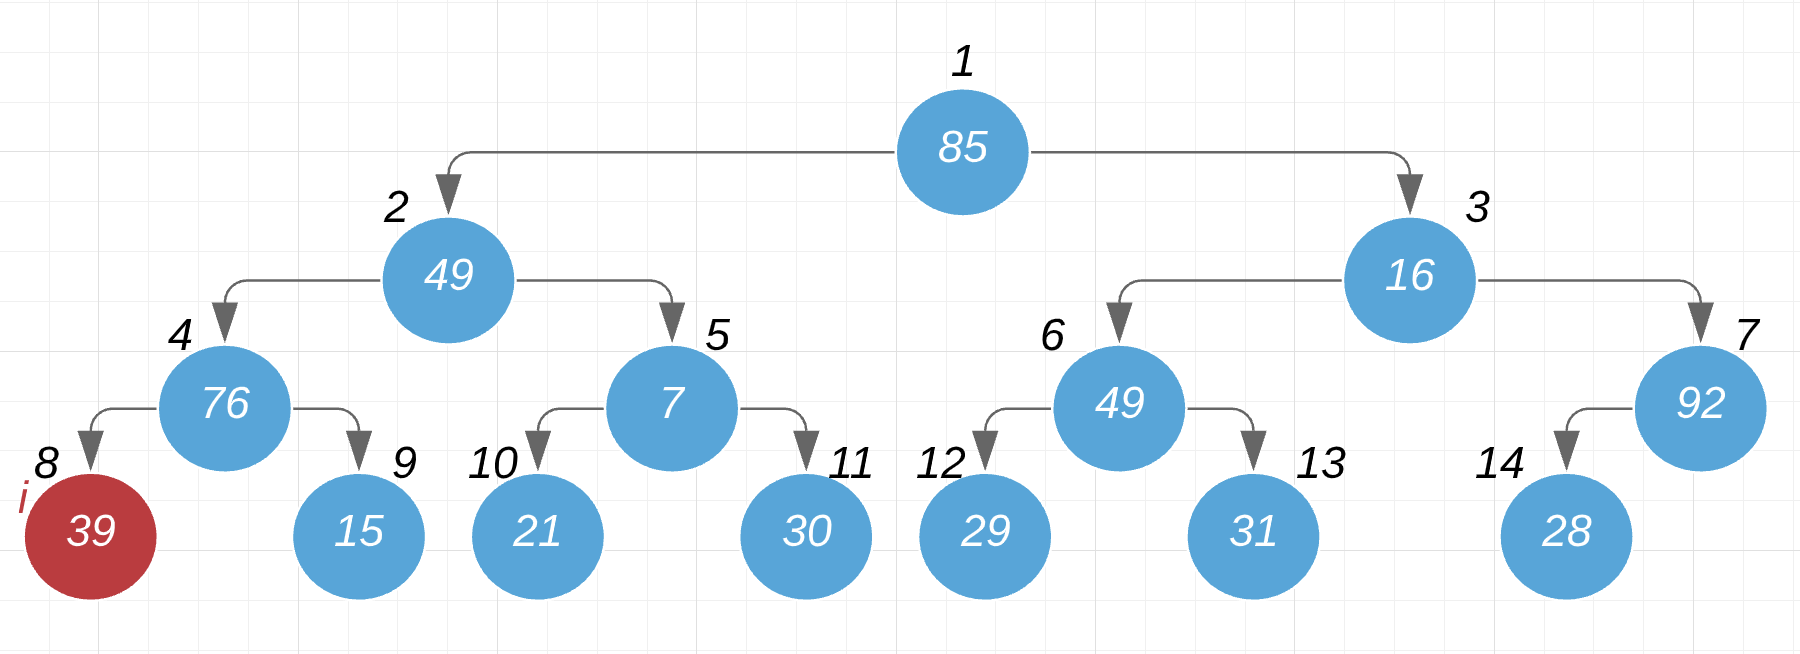
39 is a leaf now. Move to i=2. 49 < 76, so swap them:
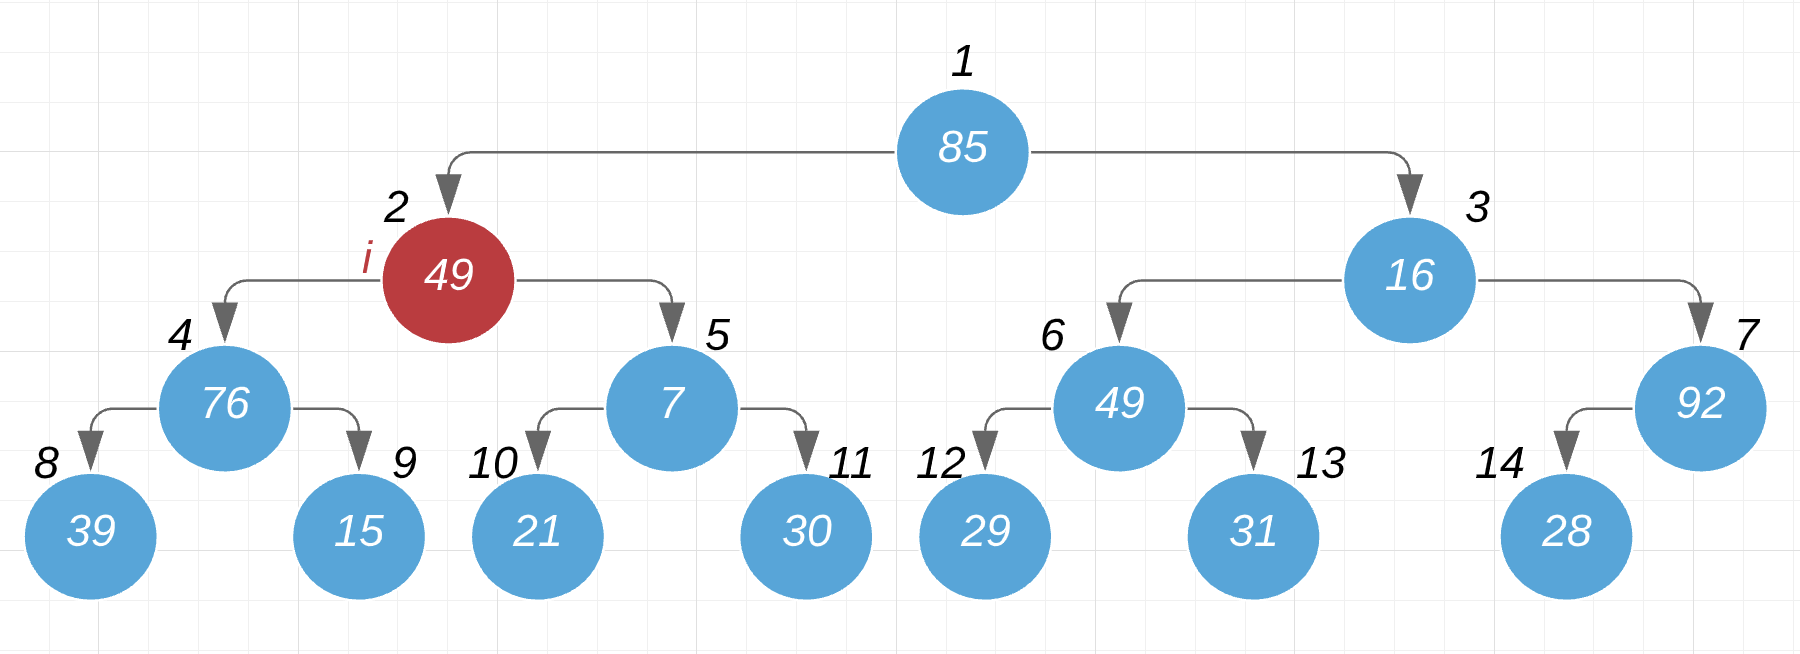
49 > 39 > 15. Move to i=3.
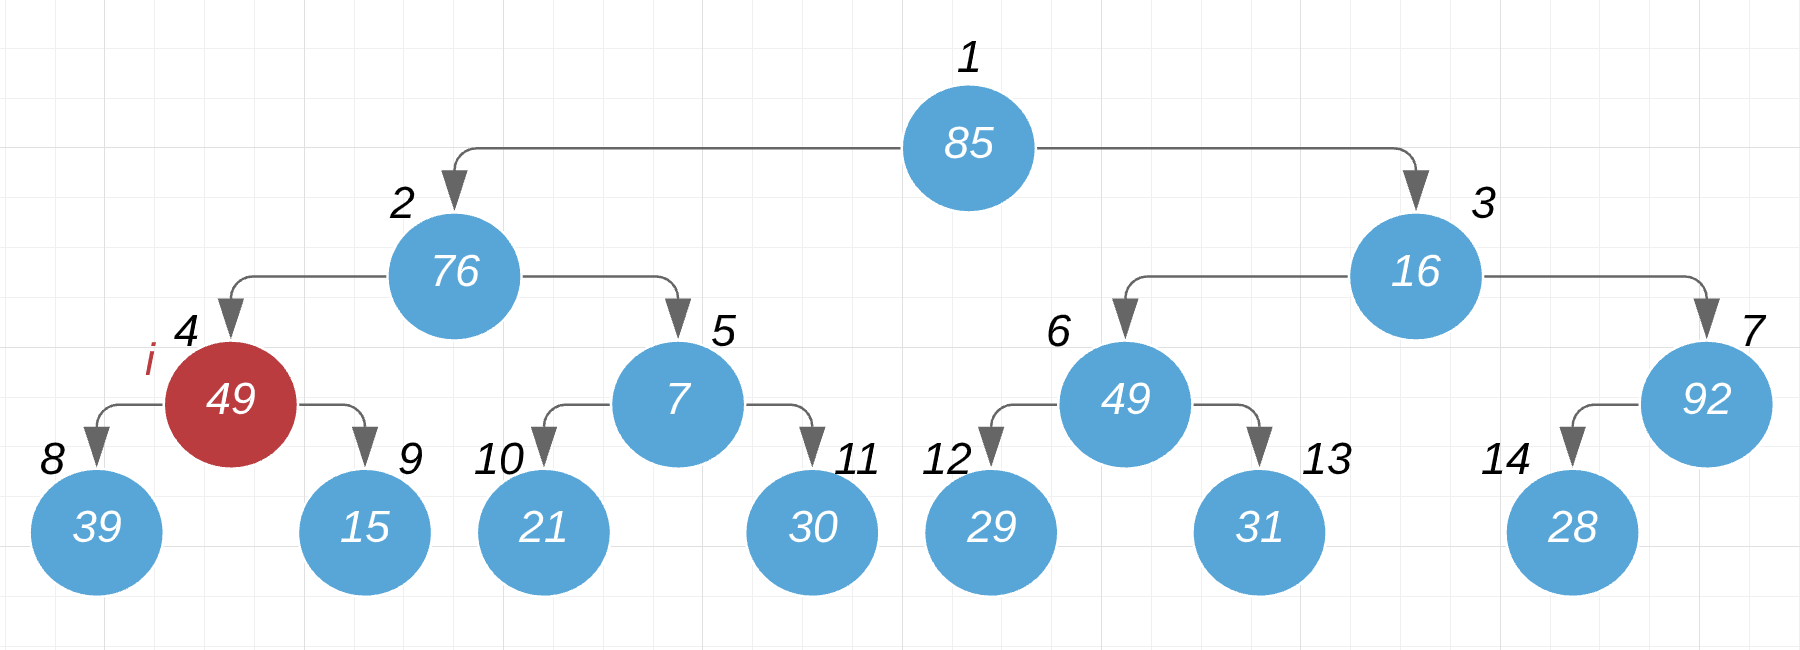
16 < 92: swap them:
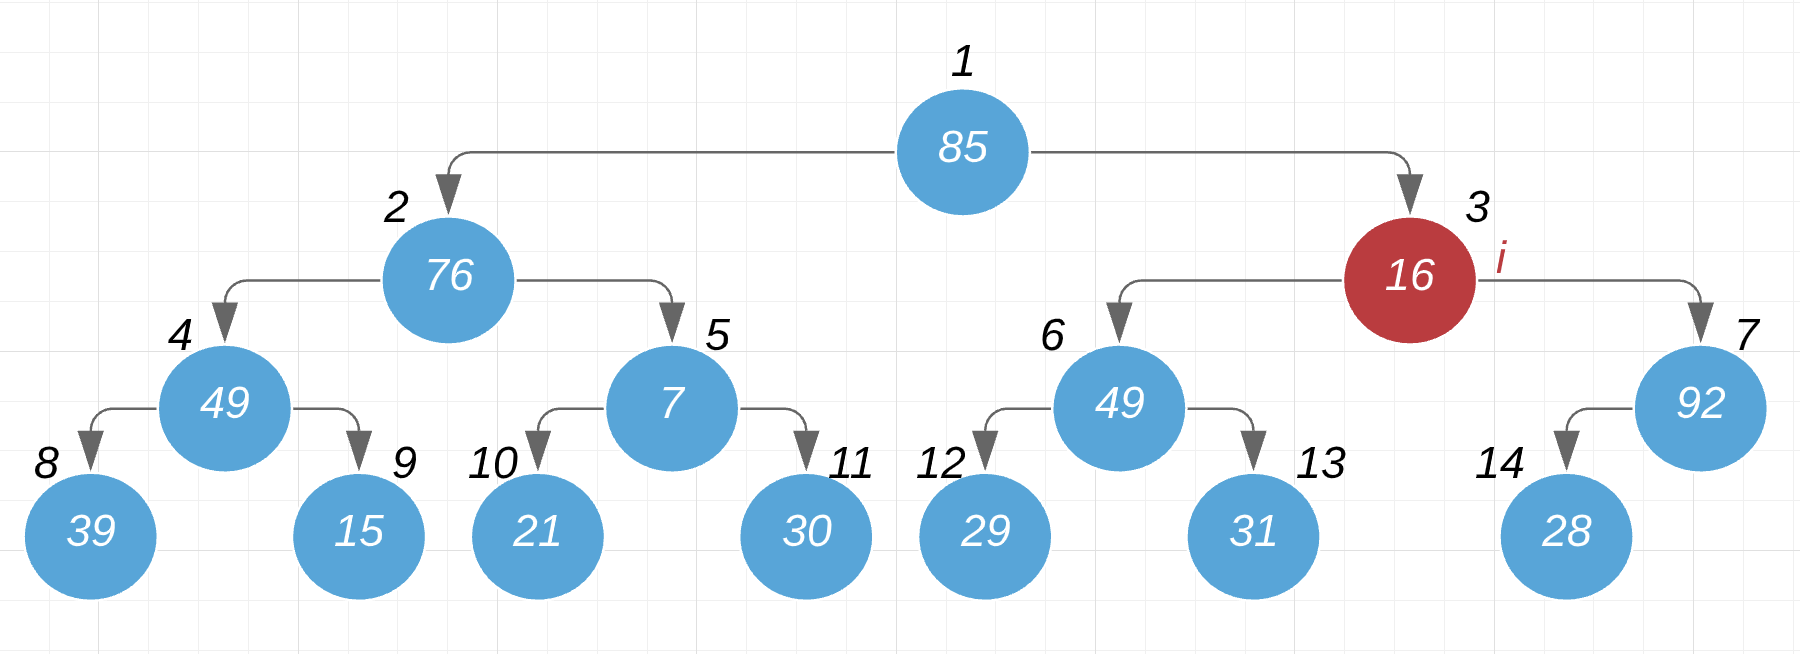
16 < 28, swap them:
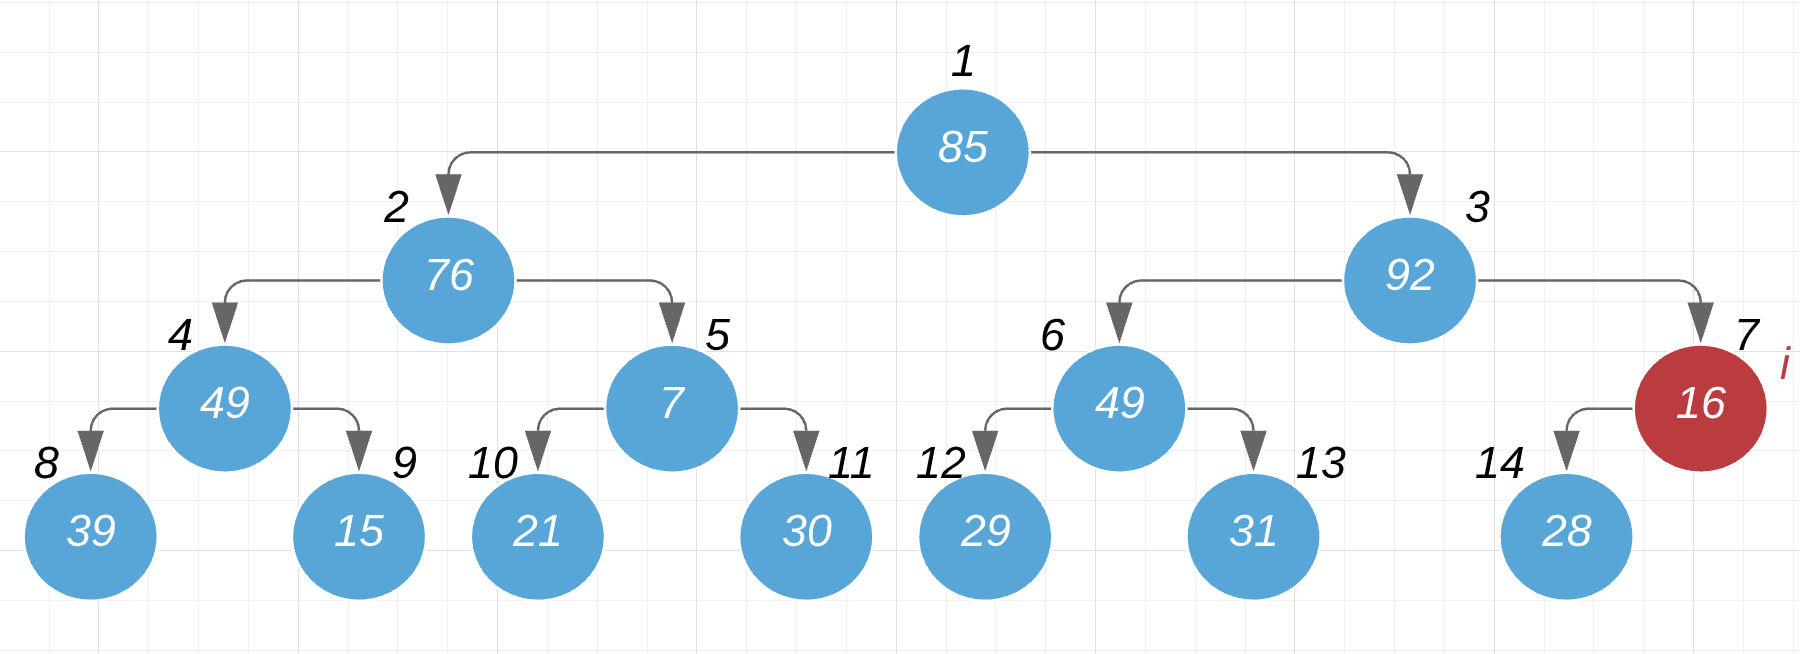
16 is a leaf. 
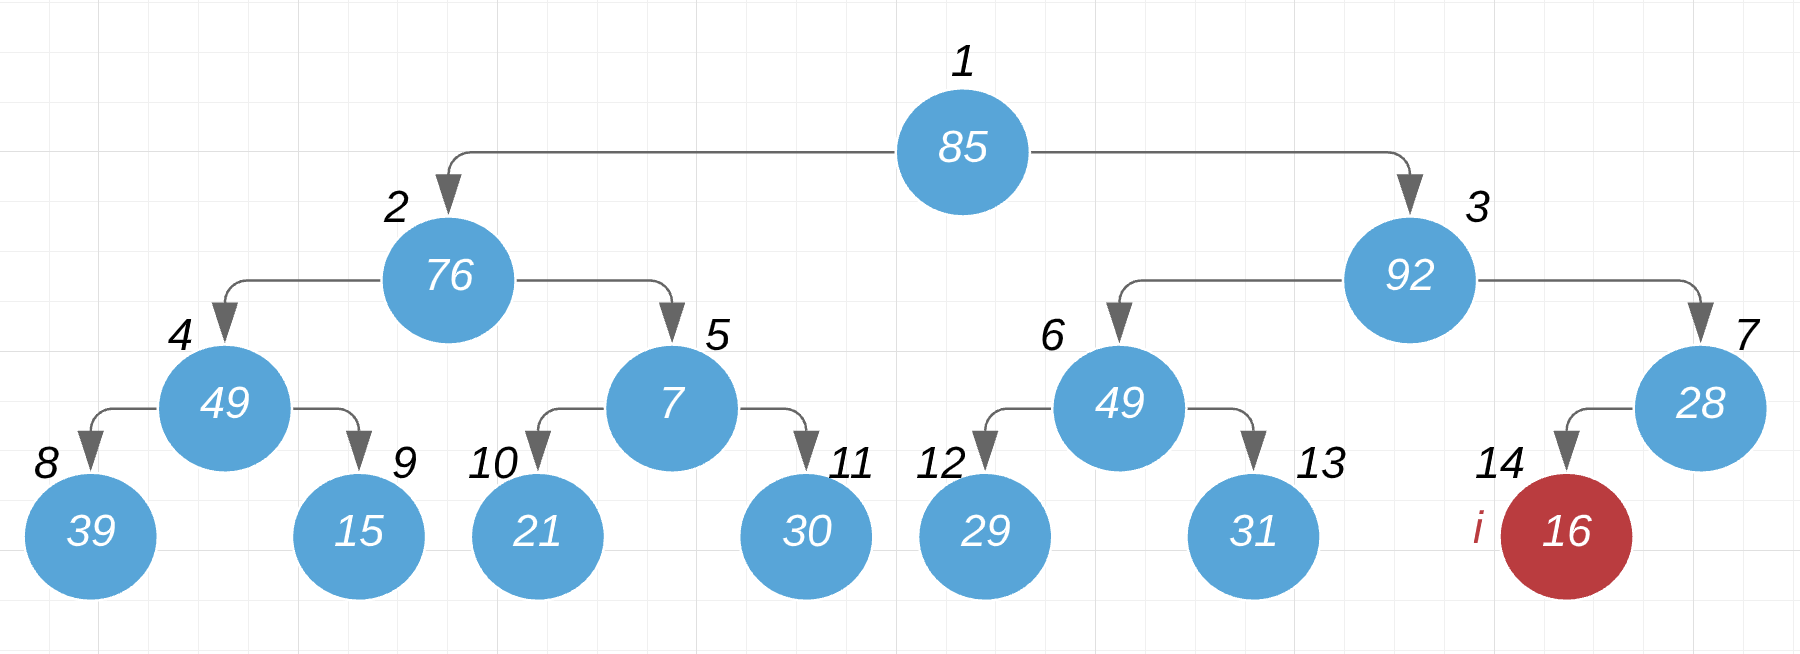
I was a bit confused here on whether I should move to i=1 or i=5. But since the calls are recursive and following indexing is important here, I moved to i=1. 85 < 92, swap them:
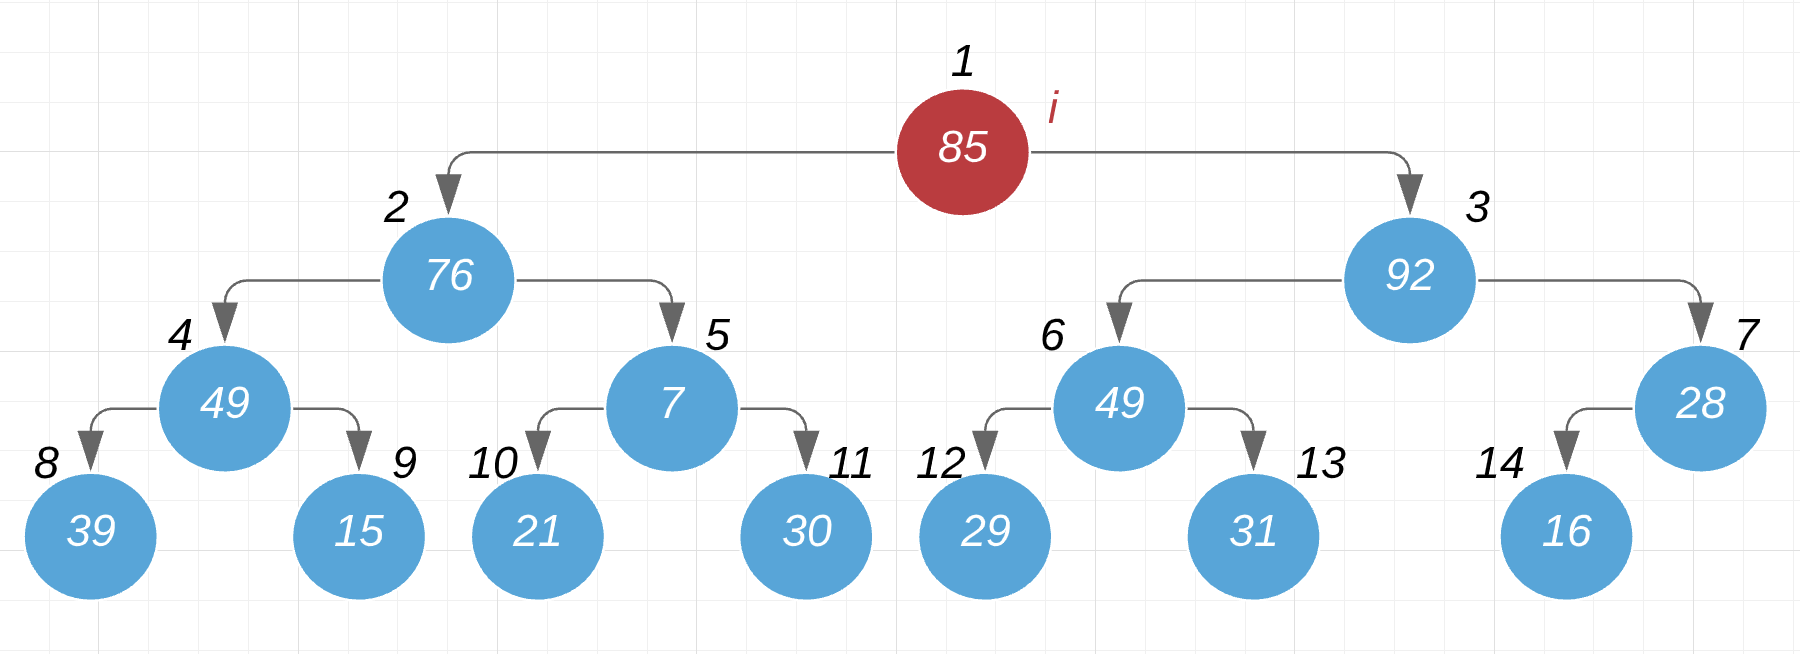
85 > 49 > 28, no need to change anything.
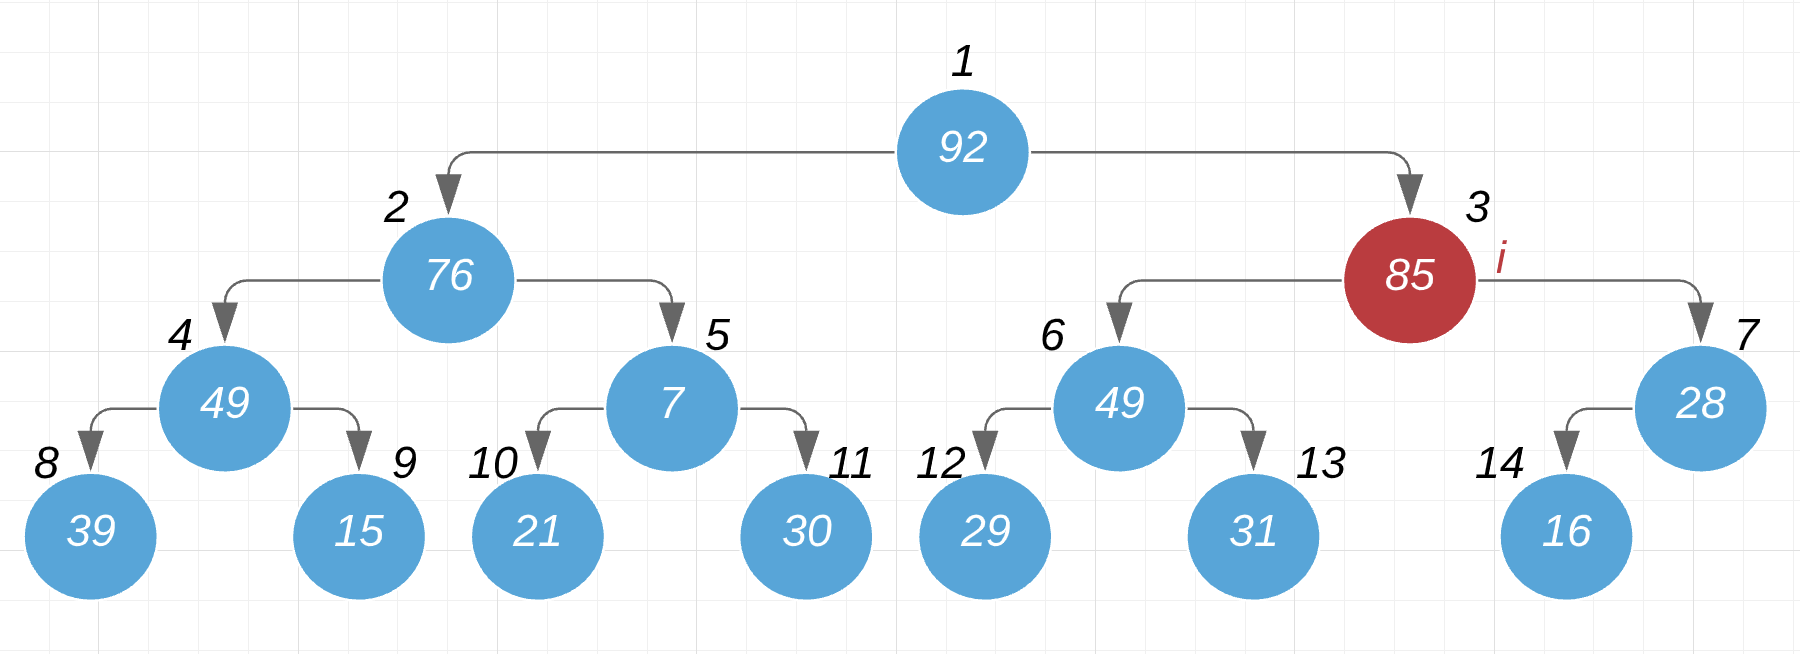
Move to i=5. 7 < 30, swap them:
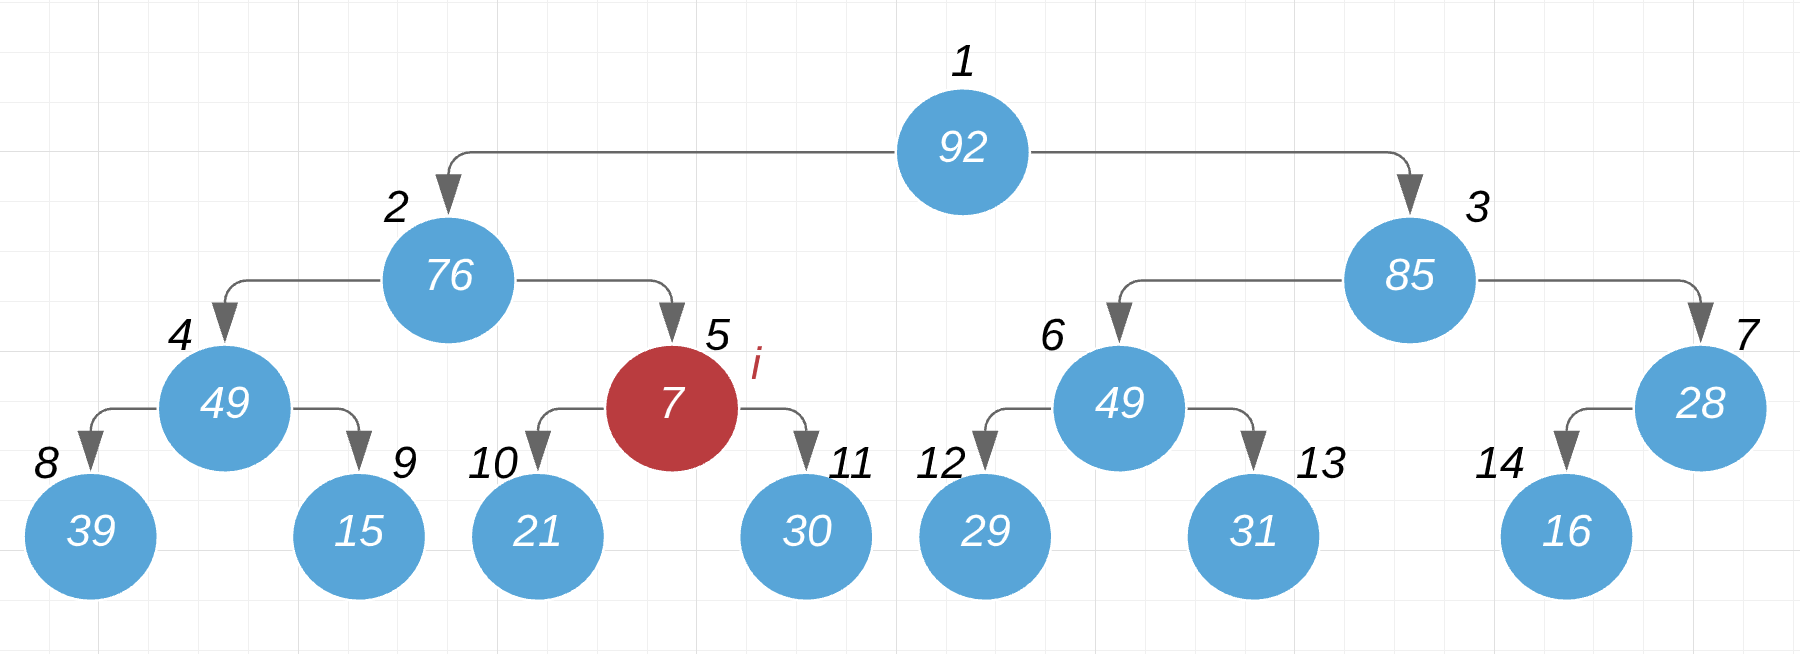
7 is a leaf and 30 > 21 > 7.
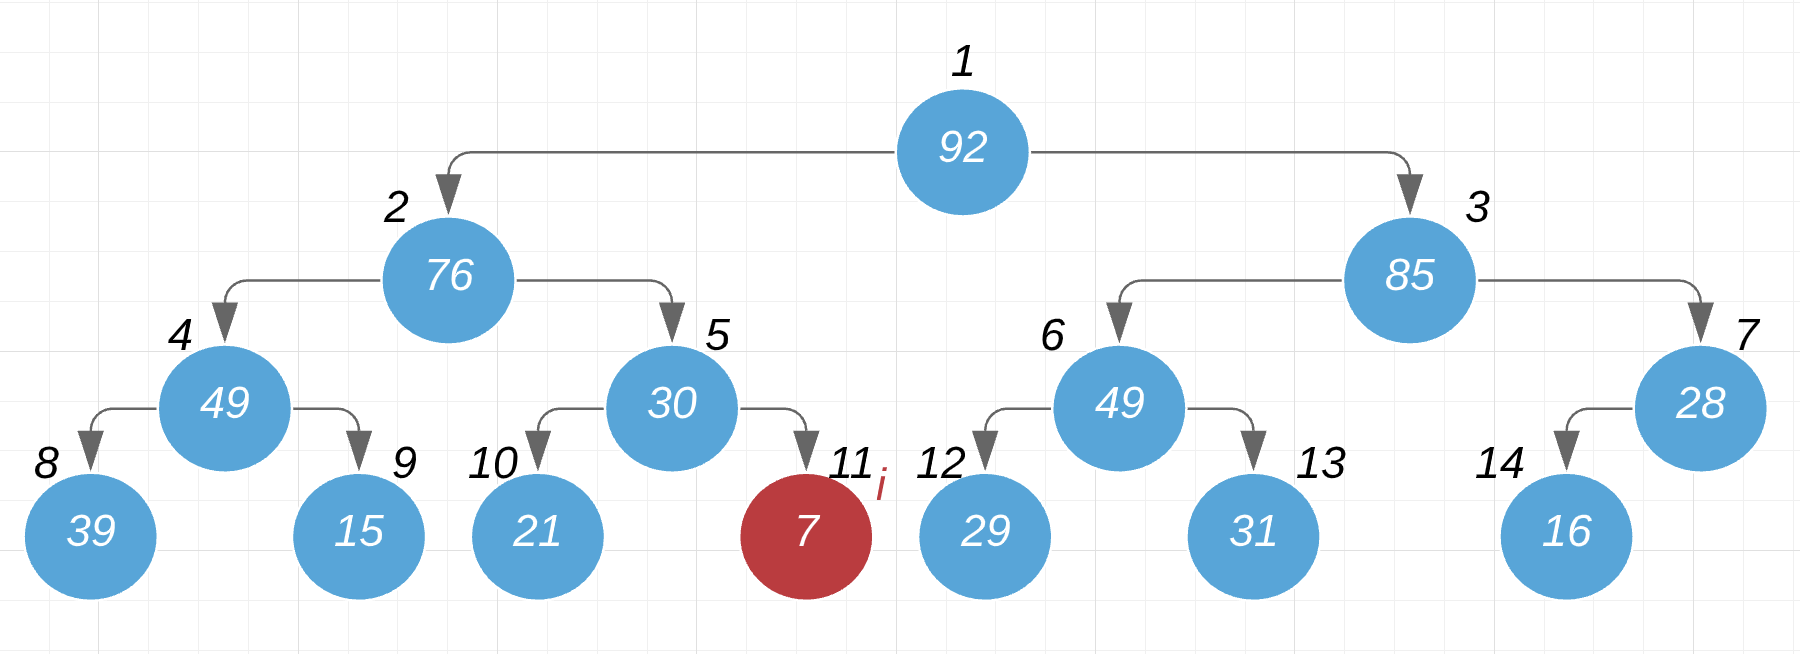
This is a valid max heap:
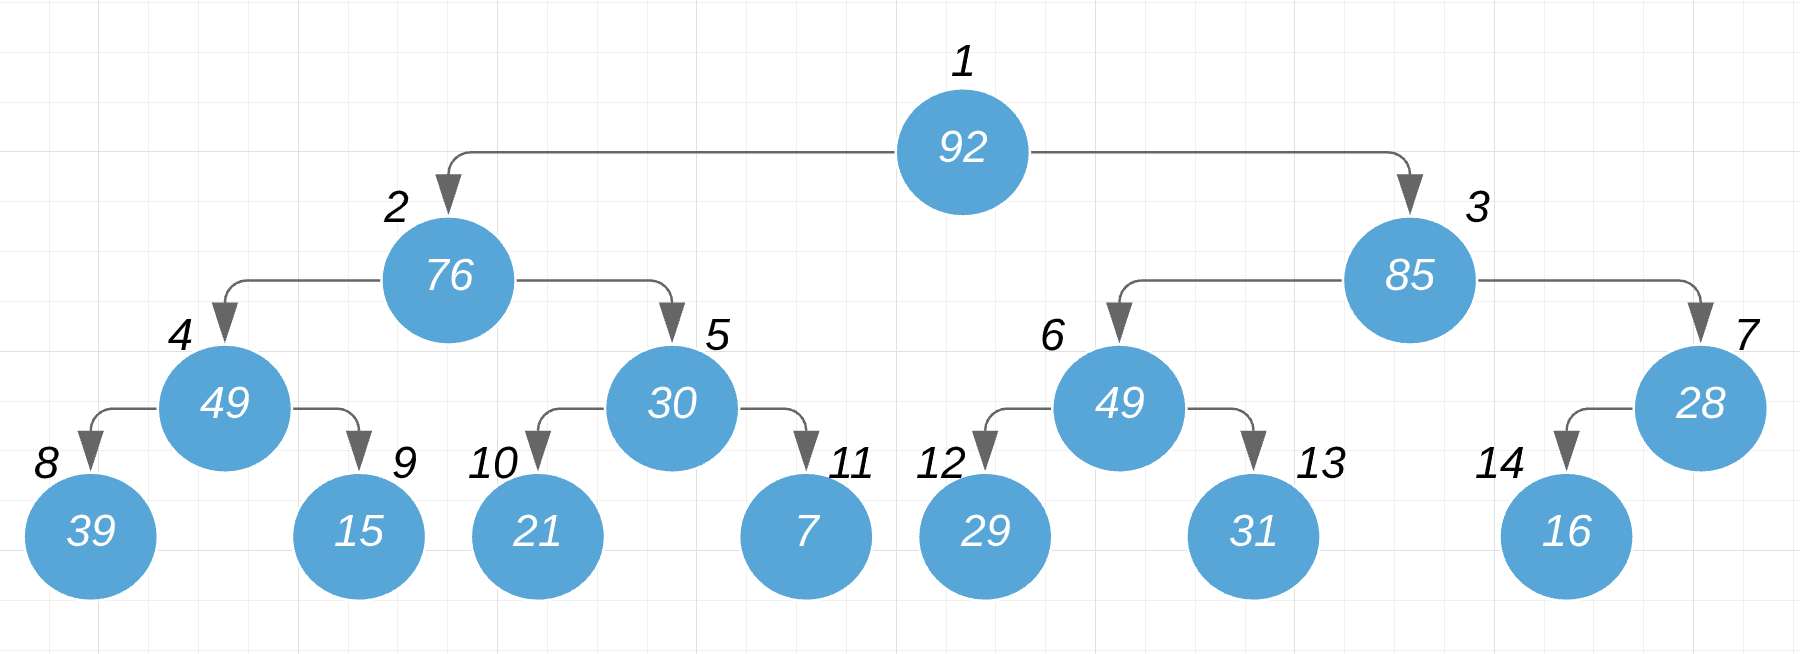

3.The array that stores the valid max heap is <92,76,85,49,30,49,28,39,15,21,7,29,31,16>.

## Question 2. 

Consider the following questions on the $MAX-HEAPIFY$ operation.

### Question 2a [time estimate: 5 minutes]

In the pseudocode of $MAX-HEAPIFY$ (Cormen et al., p.154, or you can view it [here](https://drive.google.com/open?id=1e_3jsX4-qQCfZXKMok_T6LPFh9FwtmT5)), what does A.heap-size mean and what is the idea behind the local variable largest? 


A.heap-size is the number of elements from the array you want to include in a heap. At each step, when you have A[i], and the element to its right and its left, you select the largest value out of three and store it in the local variable largest. If your A[i] is largest, the algorithm terminates because the max heap property is satisfied. If the value to the right or left of A[i] is the largest, it is swapped with A[largest].

### Question 2b [time estimate: 2 minutes]

The functions $LEFT(i)$ and $RIGHT(i)$, lines 1 and 2 in the $MAX-HEAPIFY$ pseudocode, return the array index of the left and right child, respectively, of a node in a binary tree. From reading Section 6.1, you know that the input to both functions is an integer number, $i$, which corresponds to the array index of the parent node in the array. Review Section 6.1 for more information. Write a Python implementation of the functions $LEFT(i)$ and $RIGHT(i)$ by filling in the cells below.

In [3]:
def left(i):
    """This function returns the index of the left child"""
    return 2*i + 1

In [4]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [5]:
def right(i):
    """This function returns the index of the right child"""
    return 2*i + 2

In [6]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 2c [time estimate: 10 minutes]

Write a Python implementation of the MAX-HEAPIFY operation using the pseudocode above, and your newly written functions, `left` and `right`.

In [7]:
def heapify(heap, i):
    """
    Parameters
    ----------
    heap : list of floats
        Assume that the heap size is the length of the heap
        
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    #assigning previously written functions to variables l and r
    l = left(i)
    r = right(i)
    
    #if the left child is greater than the i element, l becomes the largest value 
    if l < len(heap) and heap[l] > heap[i]:
        largest = l
    #if l is less than i, i is the largest
    else:
        largest = i
    ##if the right child is greater than the largest element, r becomes the largest value 
    if r < len(heap) and heap[r] > heap[largest]:
        largest = r
    #if largest is not equal to A[i], switch them
    if largest != i:
        A[i], A [largest] = A [largest], A[i]
        heapify(heap, largest)

In [8]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
assert(A == [85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28])


## Question 3 [time estimate: 3 minutes] 

Next, write a Python implementation of the BUILD_MAX_HEAP operation using the pseudocode provided in Section 6.3 of Cormen et. al. Test your Python implementation using the array in problem 1, and make sure your Python codes produce a valid max heap.

In [11]:
def build_max_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid max heap, in-place.
    
    """
    #assign length of the array to a variable
    n = len(A)
    #go thru the rest of the nodes and run heapify on them
    for j in range(n//2 -1,-1,-1):
        heapify(A, j)

In [12]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
assert(A == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

## Question 4 [time estimate: 7 minutes]

Lastly, write Python implementations of the $MIN-HEAPIFY$ and $BUILD-MIN-HEAP$ operations for a min heap data structure. You can use your $MAX-HEAPIFY$ and $BUILD-MAX-HEAP$ Python function as models, just remember that the latter two functions support operations for the max heap data structure. Test your Python implementation of $BUILD-MIN-HEAP$ using the array in problem 1, and make sure your Python codes produce a valid min heap. 

In [15]:
def min_heapify(heap, i):
    """
    Parameters
    ----------
    heap : a list of floats
        Assume that the heap size is the length of the heap.
    
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    #assigning previously written functions to variables l and r
    l = left(i)
    r = right(i)
    
    #if the left child is smaller than the i element, l becomes the smallest value 
    if l < len(heap) and heap[l] < heap[i]:
        smallest = l
    #if l is less than i, i is the largest
    else:
        smallest = i
    ##if the right child is smaller than the smallest element, r becomes the smallest value 
    if r < len(heap) and heap[r] < heap[smallest]:
        smallest = r
    #if smallest is not equal to A[i], switch them
    if smallest != i:
        A[i], A [smallest] = A [smallest], A[i]
        min_heapify(heap, smallest)

In [16]:
def build_min_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid min heap, in-place.
    
    """
    #assign length of the array to a variable
    n = len(A)
    #go thru the rest of the nodes and run min_heapify on them
    for j in range(n//2 -1,-1,-1):
        min_heapify(A, j)

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 